In [1]:
import pandas as pd
import numpy as np

In [2]:
# 6장
# 첫 번째 혼자서 해보기
mpg = pd.read_csv('mpg.csv') 

In [3]:
# Q1
# displ이 4이하인 hwy 평균
mpg_displ1 = mpg.query('displ <= 4') 
mpg_displ1['hwy'].mean()

25.96319018404908

In [4]:
# displ이 5이상인 hwy 평균
mpg_displ2 = mpg.query('displ >= 5')
mpg_displ2['hwy'].mean()

18.07894736842105

In [5]:
# Q2
# audi 차종의 cty 평균
mpg_audi = mpg.query("manufacturer == 'audi'") 
mpg_audi['cty'].mean()

17.61111111111111

In [6]:
# toyota 차종의 cty 평균
mpg_toyota = mpg.query("manufacturer == 'toyota'")
mpg_toyota['cty'].mean()

18.529411764705884

In [7]:
# Q3
# chevrolet, ford, honda 차종의 hwy 평균
mpg_manu = mpg.query("manufacturer in ['chevrolet', 'ford', 'honda']") 
mpg_manu['hwy'].mean()

22.50943396226415

In [8]:
# 두 번째 혼자서 해보기
# Q1
# category, cty 행만 따로 추출하여 위에서부터 출력
mpg_cc = mpg[['category', 'cty']] 
mpg_cc.head() 

,category,cty
0,compact,18
1,compact,21
2,compact,20
3,compact,21
4,compact,16


In [9]:
# Q2
# category가 각각 suv, compact 인 차종의 cty 평균
mpg_cc.query("category == 'suv'")['cty'].mean() # 13.5
mpg_cc.query("category == 'compact'")['cty'].mean() # 20.1

20.127659574468087

In [10]:
# 세 번째 혼자서 해보기 
# Q1 
# audi 차종을 hwy 기준으로 내림차순 정렬
mpg.query('manufacturer == "audi"')\
    .sort_values('hwy', ascending=False)\
    .head()

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [11]:
# 네 번째 혼자서 해보기
# Q1
# mpg 데이터프레임 복사 후, assign() 함수로 cty, hwy 의 합계변수 CH 생성
mpg_new = mpg.copy()
mpg_new = mpg_new.assign(CH = mpg_new['cty'] + mpg_new['hwy'])

In [12]:
# Q2
# 합계변수를 나눈 CHmean 변수 생성
mpg_new = mpg_new.assign(CHmean = mpg_new['CH'] / 2)

In [13]:
# Q3
# CHmean 기준으로 내림차순 정렬
mpg_new.sort_values('CHmean', ascending=False).head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,CH,CHmean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [14]:
# Q4
# 1, 2, 3 구문 연결
mpg.assign(total = lambda x: x['cty'] + x['hwy'],
    mean = lambda x: x['total'] / 2)\
    .sort_values('mean', ascending=False)\
    .head(3)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category,total,mean
221,volkswagen,new beetle,1.9,1999,4,manual(m5),f,35,44,d,subcompact,79,39.5
212,volkswagen,jetta,1.9,1999,4,manual(m5),f,33,44,d,compact,77,38.5
222,volkswagen,new beetle,1.9,1999,4,auto(l4),f,29,41,d,subcompact,70,35.0


In [15]:
# 다섯 번째 혼자서 해보기 
# Q1
# category 별로 cty의 평균값 집계
mpg.groupby('category')\
    .agg(mean_cty = ('cty', 'mean'))

,mean_cty
category,
2seater,15.400000
compact,20.127660
midsize,18.756098
minivan,15.818182
pickup,13.000000
subcompact,20.371429
suv,13.500000


In [16]:
# Q2
# category 별로 cty의 평균값 집계를 내림차순(높은순)으로 정렬
mpg.groupby('category')\
    .agg(mean_cty = ('cty', 'mean'))\
    .sort_values('mean_cty', ascending=False)

,mean_cty
category,
subcompact,20.371429
compact,20.127660
midsize,18.756098
minivan,15.818182
2seater,15.400000
suv,13.500000
pickup,13.000000


In [17]:
# Q3
# hwy 평균이 가장 높은 회사 세 곳을 출력
mpg.groupby('manufacturer')\
    .agg(mean_hwy = ('hwy', 'mean'))\
    .sort_values('mean_hwy', ascending=False)\
    .head(3)

,mean_hwy
manufacturer,
honda,32.555556
volkswagen,29.222222
hyundai,26.857143


In [18]:
# Q4-1
# groupby 한 다음, n 변수에 차종 개수 집계 후 sort_values 로 정렬
mpg.query('category == "compact"')\
    .groupby('manufacturer')\
    .agg(n = ('manufacturer', 'count'))\
    .sort_values('n', ascending=False)

,n
manufacturer,
audi,15
volkswagen,14
toyota,12
subaru,4
nissan,2


In [19]:
# Q4-2
# groupby 하지 않고 value_counts 로 바로 내림차순 정렬
mpg.query('category == "compact"')\
    .value_counts('manufacturer')

manufacturer
audi          15
volkswagen    14
toyota        12
subaru         4
nissan         2
dtype: int64

In [20]:
# 여섯 번째 혼자서 해보기
# Q1
fuel = pd.DataFrame({'fl' : ['c','d','e','p','r'],
                     'price_fl' : [2.35,2.38,2.11,2.76,2.22]})
fuel

# merge 함수로 mpg 데이터에 fuel 데이터 병합
mpg = pd.merge(mpg, fuel, how = 'left', on ='fl')

In [21]:
# Q2
# 변수 추출해서 앞부분 5행 출력
mpg[['model','fl','price_fl']].head()

,model,fl,price_fl
0,a4,p,2.76
1,a4,p,2.76
2,a4,p,2.76
3,a4,p,2.76
4,a4,p,2.76


In [22]:
##############################################################################

In [23]:
# 7장
# 첫 번째 혼자서 해보기
# Q1
# 임의로 결측치 생성
mpg = pd.read_csv('mpg.csv')
mpg.loc[[64,123,130,152,211], 'hwy'] = np.nan # hwy의 각 행에 NaN 할당

# 결측치의 개수(isna)를 모두 더해보기(sum)
mpg[['drv','hwy']].isna().sum() # 결측치 5개 발견

drv    0
hwy    5
dtype: int64

In [24]:
# Q2
# dropna() 로 결측치 제거 후, 구동방식(groupby) 별로 hwy 의 평균 집계(agg)
mpg.dropna(subset = ['hwy'])\
    .groupby('drv')\
    .agg(mean_hwy = ('hwy', 'mean'))

,mean_hwy
drv,
4,19.242424
f,28.200000
r,21.000000


In [25]:
# 두 번째 혼자서 해보기
# Q1 
mpg.loc[[9,13,57,92],'drv'] = 'k' # drv에 존재할 수 없는 이상치 할당
mpg.loc[[28,42,128,202],'cty'] = [3,4,39,42] # cty에 극단치 할당

# drv에 이상치 유무 확인
mpg['drv'].value_counts().sort_index() 

# drv가 4,f,r 이면 기존값 유지, 아니면 NaN 부여
mpg['drv'] = np.where(mpg['drv'].isin(['4','f','r']), mpg['drv'], np.nan)

# 이상치 확인
mpg['drv'].value_counts().sort_values()

## drv의 이상치(k) 정상적으로 제거

r     24
4    100
f    106
Name: drv, dtype: int64

<Axes: ylabel='cty'>

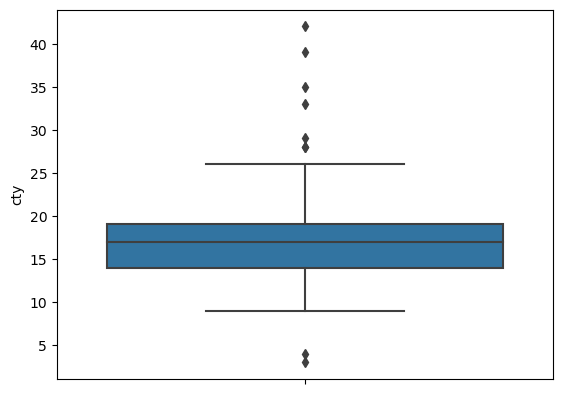

In [26]:
# Q2
# 이제 cty에 극단치 제거할 차례
import seaborn as sns

sns.boxplot (data = mpg, y='cty')

In [27]:
pct25 = mpg['cty'].quantile(.25) # 1사분위 수
pct75 = mpg['cty'].quantile(.75) # 3사분위 수
iqr = pct75 - pct25

pct25 - 1.5 * iqr # 하한
pct75 + 1.5 * iqr # 상한

26.5

<Axes: ylabel='cty'>

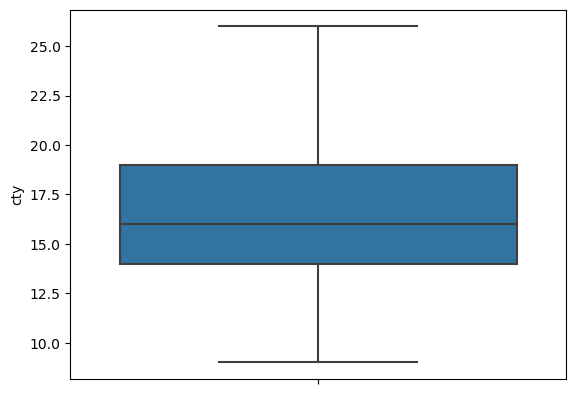

In [28]:
# 상자 그림 기준으로 정상 범위에서 벗어난 값을 NaN 처리, 나머지는 기존값 할당
mpg['cty'] = np.where((mpg['cty']<6.5) | (mpg['cty']>26.5), np.nan, mpg['cty'])

# 결측치가 제거된 모습
sns.boxplot(data=mpg, y='cty')

In [29]:
# 이상치를 제거한 후, drv별로 그룹화하여 cty의 평균 구하기
mpg.dropna(subset = ['drv', 'cty'])\
    .groupby('drv')\
    .agg(mean_cty = ('cty', 'mean'))

,mean_cty
drv,
4,14.247423
f,19.470000
r,13.958333
